# Project 1: Basic Data Analytics with Pandas

## Objective

Execute data exploration and data analysis in Python with a real-world dataset – Sberbank data, which is available in the [Sberbank Russian Housing Market Kaggle competition](https://www.kaggle.com/c/sberbank-russian-housing-market). Sberbank dataset contains rich and messy data about Russian's housing market. This real-world data will provide us concrete practices for getting started with python.

This step-by-step project will cover the most essential and useful techniques for data analysis in solving a real-world problem with key Python data analysis libraries: pandas and numpy. We’ll go through data loading and data frame creation, selection and query, grouping and function applying, plotting and writing data to file.  


### 1. Import necessary package

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load train and test dataset

In [2]:
# Read the train set and test set of Sberbank dataset from the train.csv and test.csv
# Read data from a CSV file using the read_csv function in pandas. 
#By default, it assumes that the fields are comma-separated.
    
Sber_train = pd.read_csv('train.csv')
Sber_test = pd.read_csv('test.csv')

### 3. Merge train and test to one dataframe and call it Sber_data

In [3]:
## The new dataframe should have the rows from train_data followed by rows from test_data. 
## Refer to [merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html). 

In [4]:
## train and test dataset shape 
print('Sberbank train data: ',Sber_train.shape)
print('Sberbank test data: ',Sber_test.shape)

Sberbank train data:  (30471, 292)
Sberbank test data:  (7662, 291)


In [5]:
## Merge train and test data using concatenate
Sber_data = pd.concat([Sber_train,Sber_test],axis=1)

In [6]:
Sber_data.shape

(30471, 583)

In [7]:
# using string formatting method to show our merge result
print(str(Sber_data.shape[0])+'={}+{}'.format(Sber_train.shape[0],Sber_test.shape[0]))

30471=30471+7662


***For the following steps, if not specified, we'll manipulate data on Sber_train. Let's create a dataframe called  Sber_df from Sber_train.***

In [8]:
Sber_df = Sber_train

### 4. Preview the first 10 columns with head()

In [9]:
## We can change the number of rows displayed by specifying a number. 
## There is a similar function tail(), which will show you the last columns of a dataframe.
Sber_df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [10]:
Sber_df.tail(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000
30470,30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,5,2,0,7,16,0,9,54,10,5600000


### 5. How many columns and rows are there in the data?

In [11]:
Sber_df.shape

(30471, 292)

### 6. Which features are available in the data? Display the features.

In [12]:
## The features are the column names. We can print them out.
Sber_df.columns.values

array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'full_all',
       'male_f', 'female_f', 'young_all', 'young_male',

### 7. What's the data type of each column? Save the datatype as data_type.

In [13]:
Sber_df.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

### 8. Which variables are numerical variables (excluding 'id')? Put all the numerical variable in list

In [14]:
#num_var: set the data type which contains int64 and float64
num_var=list(Sber_df.dtypes[Sber_df.dtypes=='int64'].index)+list(Sber_df.dtypes[Sber_df.dtypes=='float64'].index)

In [15]:
num_var

['id',
 'full_sq',
 'raion_popul',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal',
 'office_count_500',
 'office_sqm_500',
 'trc_count_500',
 'trc_sqm_500',
 'cafe_count_500',
 'cafe_count_500_

In [16]:
num_var.remove("id")

In [17]:
num_var

['full_sq',
 'raion_popul',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal',
 'office_count_500',
 'office_sqm_500',
 'trc_count_500',
 'trc_sqm_500',
 'cafe_count_500',
 'cafe_count_500_na_pric

### 9. Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data

find out several ways to solve this question. 

In [18]:
Sber_df[:5][['id','price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [19]:
Sber_df[['id','price_doc']].head(5)

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [20]:
Sber_df.iloc[:5][['id','price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [21]:
# index to 4 (5 rows) using loc
Sber_df.loc[:4][['id','price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


### 10.Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'



Use boolean indexing or query. Try both methods.

In [22]:
# boolean indexing
Sber_df[(Sber_df.full_sq>10)&(Sber_df.full_sq<1500)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [23]:
#query 
Sber_df.query('full_sq>10 and full_sq<1500')

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


### 11.Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.

In [24]:
sq_index = Sber_df.query('full_sq<life_sq').index

In [25]:
sq_index

Int64Index([ 1084,  1188,  1822,  1863,  2009,  4385,  6336,  6531,  6993,
             7208,  8101,  9237,  9256,  9482,  9646, 11332, 11711, 11784,
            12569, 13546, 13629, 13797, 14799, 16067, 16116, 16284, 20672,
            21080, 22412, 22611, 22804, 24296, 24428, 26264, 26342, 26363,
            29302],
           dtype='int64')

In [26]:
Sber_df.loc[sq_index,'life_sq']=np.NaN

### 12.Check how many rows in life_sq are NAN?

In [27]:
Sber_df.life_sq.isnull().value_counts()

False    24051
True      6420
Name: life_sq, dtype: int64

6420 rows are NAN in life_sq column 

### 13. The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?

In [28]:
Sber_df.product_type.value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [29]:
Sber_df.product_type.value_counts(normalize=True)

Investment       0.638246
OwnerOccupier    0.361754
Name: product_type, dtype: float64

### 14.Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.

First select the two columns, then group and aggregate. If you choose .aggragate() method, use np.median for the median calculation.

In [30]:
Sber_df[['product_type','price_doc']].groupby('product_type').median()

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


### 15.Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped

In [31]:
grouped=Sber_df.groupby(['product_type','state']).size()

In [32]:
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

### 16. Unstack the state index in grouped.

Use unstack() to turn the index values in state into column names.

In [33]:
grouped.unstack('state')

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,520.0,5802.0,5653.0,413.0,1.0
OwnerOccupier,4335.0,42.0,137.0,9.0,NaN


### 17. Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.

In [34]:
Sber_df['room_size']=Sber_df['life_sq']/Sber_df['num_room']

In [35]:
Sber_df['room_size']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
           ...    
30441     0.250000
30442    40.000000
30443          NaN
30444          NaN
30445    47.000000
30446    41.000000
30447          NaN
30448          NaN
30449    47.000000
30450          NaN
30451          NaN
30452    19.000000
30453     1.000000
30454    13.000000
30455    26.333333
30456    15.000000
30457    14.333333
30458     1.000000
30459          NaN
30460    16.000000
30461    19.000000
30462    30.

### 18.Change the format of timestamp to '%Y/%m/%d'.

For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [36]:
Sber_df['timestamp']=pd.to_datetime(Sber_df['timestamp'],format='%Y-%m-%d')

In [37]:
Sber_df['timestamp'][0:3]

0   2011-08-20
1   2011-08-23
2   2011-08-27
Name: timestamp, dtype: datetime64[ns]

### 19.Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week



Use apply() to apply functions to the data.

In [38]:
Sber_df['ts_year']=Sber_df['timestamp'].apply(lambda x:x.year)

In [39]:
Sber_df['ts_dayofweek']=Sber_df['timestamp'].apply(lambda x:x.dayofweek)

In [40]:
Sber_df['ts_year'].value_counts()

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: ts_year, dtype: int64

In [41]:
Sber_df['ts_dayofweek'].value_counts()

1    6091
2    5862
3    5539
0    5516
4    4978
5    2368
6     117
Name: ts_dayofweek, dtype: int64

### 20.Draw histogram of price to see the distribution.


Use matplotlib or pandas for this histogram. 

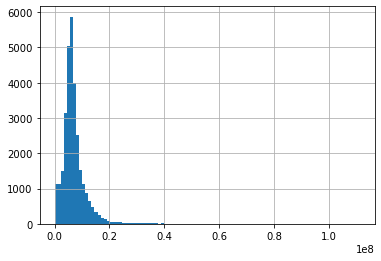

In [42]:
Sber_df.price_doc.hist(bins=100)

### 21.From the plot in Q20, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.

Apply a logorithm transformation to price and add this as a new feature called 'log_price'.

In [43]:
Sber_df['log_price']=np.log(Sber_df['price_doc'].values)

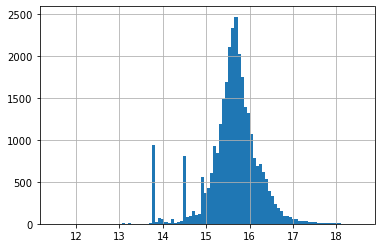

In [44]:
plt.figure()
plt.hist(Sber_df['log_price'],bins=100)
plt.grid()
plt.show()

### Drop the log_price column.

In [45]:
Sber_df.drop('log_price',axis=1,inplace=True)

### 23.Save the dataframe we have now to train_new.csv file

In [46]:
Sber_df.to_csv('train_new.csv')

**Congratulations! Now we've finished basic data processing for Sberbank dataset.**